<a href="https://colab.research.google.com/github/Aniri7777/hello-world/blob/main/NN_for_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Concatenate, MaxPool2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet101

from tensorflow.keras.preprocessing.image import ImageDataGenerator

NNs for **Images**

In [4]:
(2000 * 1000 * 3 + 1) * 256
# Това ще бъде размерността или броя тегла във този слой

1536000256

In [5]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(mnist_attributes_train, mnist_labels_train), (mnist_attributes_test, mnist_labels_test) = mnist.load_data()

In [7]:
mnist_attributes_train.shape, mnist_labels_train.shape

((60000, 28, 28), (60000,))

In [8]:
mnist_labels_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# numpy() give us format tensor
mnist_attributes_train = tf.expand_dims(mnist_attributes_train, -1).numpy()
mnist_attributes_test = tf.expand_dims(mnist_attributes_test, -1).numpy()

In [10]:
mnist_attributes_train.shape[1:]

(28, 28, 1)

In [11]:
len(set(mnist_labels_train))

10

In [12]:
Input_Shape = mnist_attributes_train.shape[1:]
Num_Classes = len(set(mnist_labels_train))

In [13]:
model = Sequential([
    Input(Input_Shape),
    Conv2D(32, 3, activation = "relu"),
    Conv2D(32, 3, activation = "relu"),
    Conv2D(16, 3, activation = "relu"),
    Conv2D(16, 3, activation = "relu"),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 16)        2320      
                                                                 
Total params: 16512 (64.50 KB)
Trainable params: 16512 (64.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
tf.keras.backend.clear_session()

In [16]:
# That's very big we want to make it smaller using: strides = 2, make future selection kind off(защото пропуска пиксели)
# Докато MaxPooling прави всичките пиксели и тогава взима максималния от тях( dimentional introduction kind off)
model = Sequential([
    Input(Input_Shape),
    Conv2D(32, 3, strides = 2, padding = "same", activation = "relu"),
# Dropout here is wrong us it replace some of teh numbers with zero(0)
    Conv2D(32, 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(16, 3, strides = 2, padding = "same", activation = "relu"),
    Conv2D(16, 3, padding = "same", activation = "relu"),
# А Flatten използваме да оeднаквим подадените данни към Dense
    Flatten(),
# Now we need clasificator(Който обединява резултатите и тъй като става въпрос за обединение на много класове използваме - activation = "softmax"):
    Dense(16, activation = "relu"),
    Dropout(0.05),
    Dense(Num_Classes, activation = "softmax")
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                        

In [18]:
# Very often we need to use optimazer with very, very little learning rate
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [19]:
# If we use validation_split = 0.1, we learn our mosel only on 0.1(10% of the datwe use for training)
history = model.fit(mnist_attributes_train, mnist_labels_train, epochs = 5, validation_split = 0.1)

Epoch 1/5
1688/1688 [==============================] - 15s 5ms/step - loss: 0.4342 - accuracy: 0.8602 - val_loss: 0.1141 - val_accuracy: 0.9675
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1209 - accuracy: 0.9653 - val_loss: 0.0723 - val_accuracy: 0.9785
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0819 - accuracy: 0.9760 - val_loss: 0.0733 - val_accuracy: 0.9813
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0682 - accuracy: 0.9797 - val_loss: 0.0478 - val_accuracy: 0.9857
Epoch 5/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0506 - val_accuracy: 0.9862


In [20]:
tf.keras.backend.clear_session()

In [21]:
model = Sequential([
    Input(Input_Shape),
    Conv2D(32, 3, strides = 2, padding = "same", activation = "relu"),
# Dropout here is wrong us it replace some of teh numbers with zero(0)
    Conv2D(32, 3, padding = "same", activation = "relu"),
    MaxPool2D(),
    Conv2D(16, 3, strides = 2, padding = "same", activation = "relu"),
    Conv2D(16, 3, padding = "same", activation = "relu"),
# А Flatten използваме да оeднаквим подадените данни към Dense, едно до друго
#    Flatten(),
# GlobalAveragePooling2D(), редуцира размерноста вече по каналите, запазва по един елемент от всеки канал
    GlobalAveragePooling2D(),
# Now we need clasificator(Който обединява резултатите и тъй като става въпрос за обединение на много класове използваме - activation = "softmax"):
    Dense(16, activation = "relu"),
    Dropout(0.05),
    Dense(Num_Classes, activation = "softmax")
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                

In [23]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [24]:
history = model.fit(mnist_attributes_train, mnist_labels_train, epochs = 5, validation_split = 0.1)

Epoch 1/5
1688/1688 [==============================] - 15s 7ms/step - loss: 0.4573 - accuracy: 0.8578 - val_loss: 0.1249 - val_accuracy: 0.9648
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1470 - accuracy: 0.9561 - val_loss: 0.0773 - val_accuracy: 0.9770
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1078 - accuracy: 0.9681 - val_loss: 0.0673 - val_accuracy: 0.9798
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0857 - accuracy: 0.9743 - val_loss: 0.0782 - val_accuracy: 0.9787
Epoch 5/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0791 - accuracy: 0.9766 - val_loss: 0.0622 - val_accuracy: 0.9827


In [25]:
model.evaluate(mnist_attributes_test, mnist_labels_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9820


[0.05827895551919937, 0.9819999933242798]

In [26]:
model.save_weights("model_global_pooling.h5")

In [27]:
len(model.layers[0].weights)

2

In [28]:
model.layers[0].kernel[:, :, :, 0].shape

TensorShape([3, 3, 1])

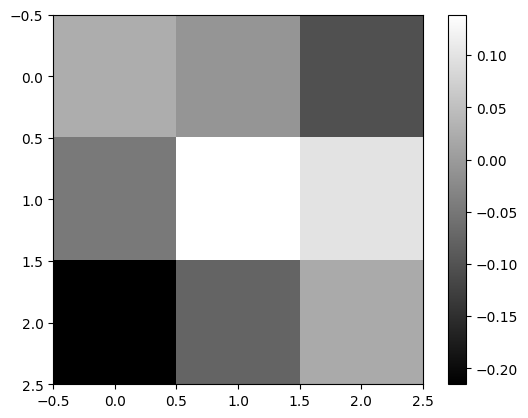

In [29]:
# First layer
plt.imshow(model.layers[0].kernel[:, :, :, 0], cmap = "gray")
plt.colorbar()
plt.show()

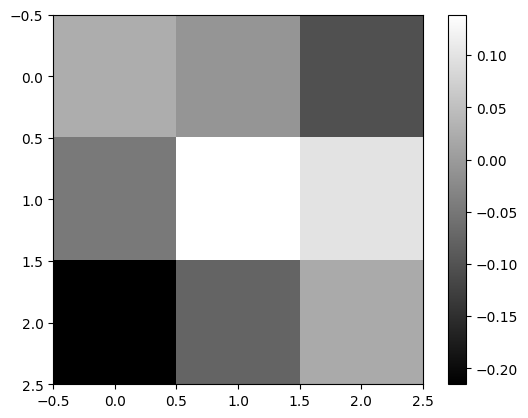

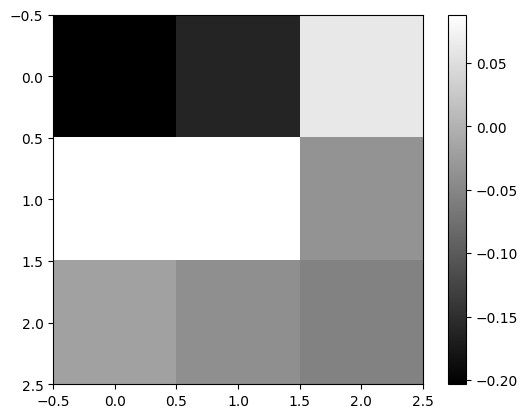

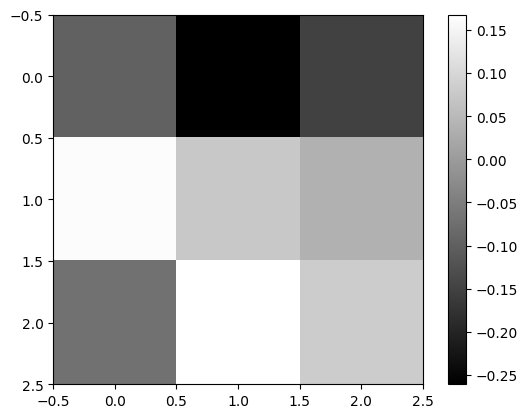

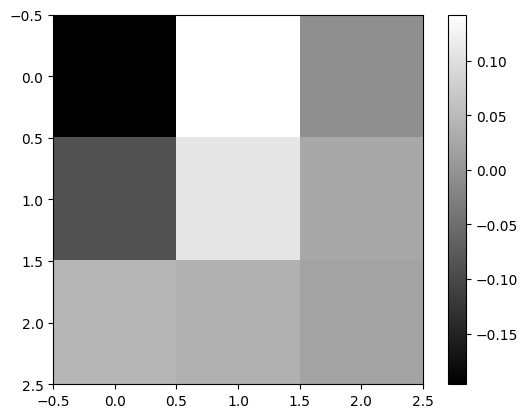

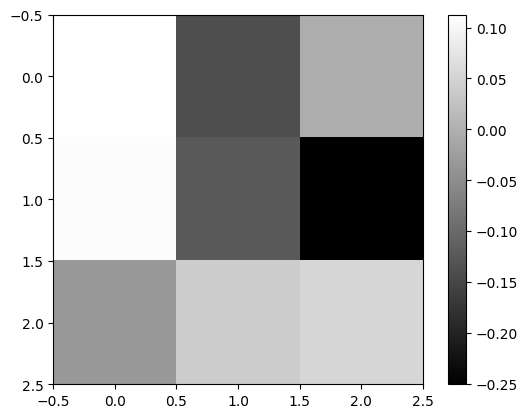

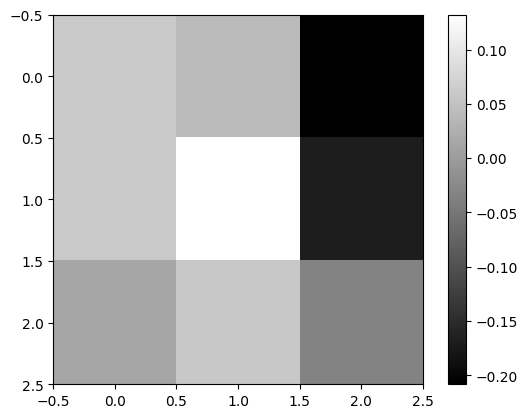

In [30]:
for i in range(6):
  plt.imshow(model.layers[0].kernel[:, :, :, i], cmap = "gray")
  plt.colorbar()
  plt.show()

In [31]:
# There are 32 chanels, that's not a image
model.layers[3].kernel.shape

TensorShape([3, 3, 32, 16])

(array([14., 24., 26., 43., 44., 42., 49., 34.,  9.,  3.]),
 array([-0.28745985, -0.23017754, -0.17289522, -0.11561292, -0.05833061,
        -0.0010483 ,  0.05623401,  0.11351632,  0.17079863,  0.22808094,
         0.28536326]),
 <BarContainer object of 10 artists>)

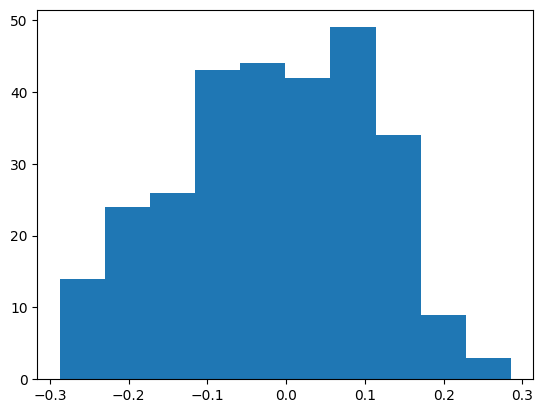

In [32]:
plt.hist(model.layers[0].kernel.numpy().ravel())

In [33]:
# Входни данни
input = Input((20, 20, 32))

In [34]:
# With from tensorflow.keras.models import Model
# Можем да запазваме отделните слоеве(лаъерс) като една или повече променливи
# layer one is Conv2D(32, (3, 3))
# Това е първата мрежа със два слоя: Conv2D(32, (3, 3)) и входни данни: input
# x = Conv2D(32, (3, 3), activation = "relu")(input)
# x = Conv2D(32, (3, 3), activation = "relu")(x)
# Then we can continue with MaxPooling
# x = MaxPool2D()(x)

In [35]:
# We can make second layer with: y, which take x as a argument
# x = Conv2D(32, (3, 3))(input)
# y = Conv2D(32, (3, 3))(x)
# Callin y give as: <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'conv2d_19')>

In [36]:
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(input)
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)

long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)

concat = Concatenate()([long_path, x])
# Same as concat = Add()([long_path, x])

x = Conv2D(32, (3, 3), activation = "relu")(concat)

In [37]:
long_path

<KerasTensor: shape=(None, 20, 20, 32) dtype=float32 (created by layer 'conv2d_7')>

In [38]:
concat

<KerasTensor: shape=(None, 20, 20, 64) dtype=float32 (created by layer 'concatenate')>

In [39]:
x

<KerasTensor: shape=(None, 18, 18, 32) dtype=float32 (created by layer 'conv2d_8')>

In [40]:
resnet_block = Model(inputs = [input], outputs = [x])

In [41]:
resnet_block

In [42]:
resnet_block.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 20, 20, 32)]         0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 20, 20, 32)           9248      ['input_2[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 20, 20, 32)           9248      ['conv2d_4[0][0]']            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 20, 20, 32)           9248      ['conv2d_5[0][0]']            
                                                                                              

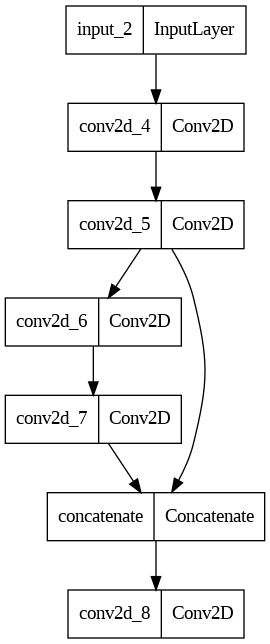

In [43]:
tf.keras.utils.plot_model(resnet_block)

**ResNet(Residual Networks)**

In [44]:
# в горният случей модела има няколко слоя след това разклонява, можем да пропуснем слоевете и да вземем само разклонението

In [45]:
# Но един модел може и да има друг във него
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(input)

resnet_block_start = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)

long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(resnet_block_start)
long_path = Conv2D(32, (3, 3), padding = "same", activation = "relu")(long_path)

concat = Concatenate()([long_path, resnet_block_start])
# Same as concat = Add()([long_path, x])

x = Conv2D(32, (3, 3), activation = "relu")(concat)

In [46]:
x

<KerasTensor: shape=(None, 18, 18, 32) dtype=float32 (created by layer 'conv2d_13')>

In [47]:
resnet_block = Model(inputs = [resnet_block_start], outputs = [x])

In [48]:
resnet_block.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 20, 20, 32)]         0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 20, 20, 32)           9248      ['input_3[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 20, 20, 32)           9248      ['conv2d_11[1][0]']           
                                                                                                  
 concatenate_1 (Concatenate  (None, 20, 20, 64)           0         ['conv2d_12[1][0]',           
 )                                                                   'input_3[0][0]']       

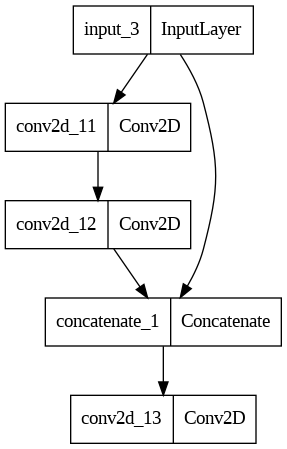

In [49]:
tf.keras.utils.plot_model(resnet_block)

In [50]:
# resnet_block = Model(inputs = [resnet_block_start], outputs = [x])
# Or we can cut part of it
resnet_block = Model(inputs = [resnet_block_start], outputs = [concat])

In [51]:
resnet_block.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 20, 20, 32)]         0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 20, 20, 32)           9248      ['input_4[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 20, 20, 32)           9248      ['conv2d_11[2][0]']           
                                                                                                  
 concatenate_1 (Concatenate  (None, 20, 20, 64)           0         ['conv2d_12[2][0]',           
 )                                                                   'input_4[0][0]']       

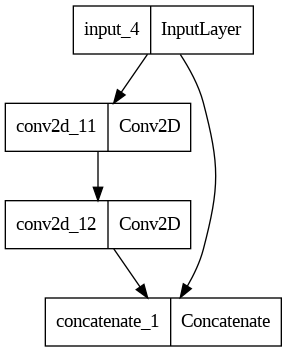

In [52]:
tf.keras.utils.plot_model(resnet_block)

In [53]:
Concatenate()([concat, concat])

<KerasTensor: shape=(None, 20, 20, 128) dtype=float32 (created by layer 'concatenate_2')>

**1x1 Convolutions(Network in Network)**

In [54]:
x = Dense(1)(input)

In [55]:
one_by_one_conv = Model(inputs = [input], outputs = [x])

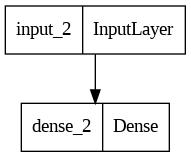

In [56]:
tf.keras.utils.plot_model(one_by_one_conv)

In [57]:
# As we can see this model change our filter from 32 to 1 which is not o.k
one_by_one_conv.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 20, 32)]      0         
                                                                 
 dense_2 (Dense)             (None, 20, 20, 1)         33        
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# So istead of Dense(1) layer 1 we gonna use conv2D(32, (1, 1)) - Конвекционнен слой със 32 елемента
x = Conv2D(32, (1, 1))(input)

In [59]:
one_by_one_conv = Model(inputs = [input], outputs = [x])

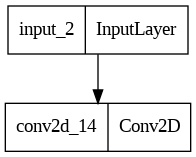

In [60]:
tf.keras.utils.plot_model(one_by_one_conv)

In [61]:
one_by_one_conv.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 20, 32)]      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 32)        1056      
                                                                 
Total params: 1056 (4.12 KB)
Trainable params: 1056 (4.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **INCEPTION(v1, v2, v3, v4 and Inception-Res-Net)**

In [62]:
# Functional model - which is like our model we last did
#resnet = ResNet101(weights = None, include_top = False), include_top = False - без последният ред
resnet = ResNet101(weights = "imagenet", include_top = False)

171446536/171446536 [==============================] - 2s 0us/step


In [63]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                      

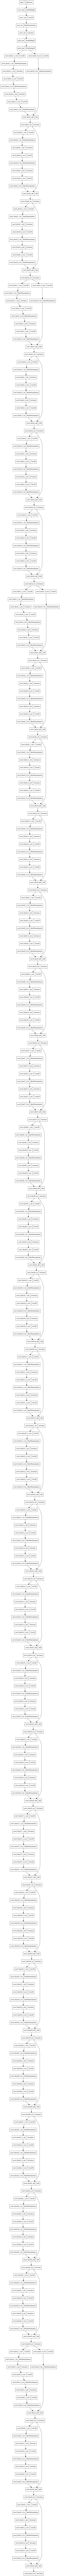

In [64]:
tf.keras.utils.plot_model(resnet)

In [65]:
x = Dense(Num_Classes, activation = "softmax")(resnet.output)

In [66]:
x

<KerasTensor: shape=(None, None, None, 10) dtype=float32 (created by layer 'dense_3')>

In [67]:
# We take third layer and we want to see if we can train it - the answer is "Yes" - True
resnet.layers[2].trainable

True

In [68]:
# Тук замразихме броя на параметрите на модела, така през тях няма да минават градиенти, а ще бъдат нули(0)
# Те няма да бъдат тренирани, обаче моят х, ще се обучава
# We frizee the model which makes future extraction and we train for him model who make classification or other we have to solve
for layer in resnet.layers:
  layer.trainable = False

In [69]:
# Модела няма да разпознава текст и трябжа да има същият шейп на данните

In [70]:
resnet.inputs

[<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_5')>]

In [71]:
# tunning - with part frezee data added to the thaining data
# fine tunning - we take the model and we fit it all

# **A lot of models we can see and use straight away: tensorflow/hub**

**TF-Vision Model Garden**

In [72]:
!pip install keras-cv

In [73]:
import keras_cv

Using TensorFlow backend


In [75]:
keras_cv.models.ResNet101V2Backbone()

INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/resnetv2/keras/resnet101_v2/2/download/config.json...
100%|██████████| 872/872 [00:00<00:00, 818kB/s]


In [76]:
classifier = keras_cv.models.ImageClassifier(backbone = keras_cv.models.ResNet101V2Backbone(), num_classes = Num_Classes)

In [78]:
images_generated = ImageDataGenerator()

In [85]:
training_data = images_generated.flow_from_directory("/content/gdrive/MyDrive/training_images")

Found 0 images belonging to 0 classes.


In [86]:
batch = next(training_data)

In [89]:
len(batch)

2

In [90]:
batch[0].shape

(0, 256, 256, 3)

In [91]:
batch[1].shape

(0, 0)